## **Neural Networks Classification**

* If the output can be either 0 or 1, we call it Binary Classification.
* If there can multiple outputs, we call it Multi-class classification.

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print(tf.__version__)

2.19.0


In [5]:
from sklearn.datasets import make_circles

n_samples =1000
X, y = make_circles(n_samples, noise=0.03,
                               random_state=42)

In [4]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [6]:
y[:20]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [6]:
import pandas as pd

circles = pd.DataFrame(
                      {'X0': X[:, 0], 'X1': X[:, 1], 'label': y}
                      )
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [10]:
circles.label.value_counts()

,count
label,
1,500
0,500


In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [5]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(X, y, epochs=5)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4887 - loss: 6.4880   
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4608 - loss: 5.8319 
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4459 - loss: 5.2480 
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4628 - loss: 5.7547 
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5248 - loss: 4.5436 


## 50% Accuracy
The Model is performing like guessing. Let's improve its accuracy.

In [6]:
model_1.fit(X,y, epochs=200, verbose=0)

In [7]:
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4852 - loss: 0.6927  


[0.6932879686355591, 0.4729999899864197]

* Even after 200 epochs the model is still performing poorly.
* Let's add an extra layer

In [9]:
from re import VERBOSE
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

history_2 = model_2.fit(X, y, epochs=200, verbose=0)

In [ ]:
df_model_2 = pd.DataFrame(history_2.history)
df_model_2.plot()

In [11]:
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4955 - loss: 0.6931  


[0.6932729482650757, 0.5]

## Model Results So far

* Even after changing the architecture the model performances didn't improve as expected.

Some best practices for improving model performances.

* Increasing the no of Layers
* Increasing the no of Hidden Units
* Changing the Learning Rate

All these above are Hyperparameters and the practice of finding the right Hyperparameters is called Parametric Tuning.

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1,activation= "sigmoid")
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history_3 = model_3.fit(X, y, epochs=200, verbose=1)

## Plotting the decision Boundary

* In above we set the activation function to "relu" for Hidden Layers
* "sigmoid" for output layer.
* The optimizer was changed to "Adam"
* We also set the Learning Rate = 0.01

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a Keras model predicting on X.
    Works for both binary and multi-class classification.
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Create grid of points
    x_in = np.c_[xx.ravel(), yy.ravel()]

    # Predict probabilities
    y_pred = model.predict(x_in)

    # Binary classification (sigmoid output → shape: (N,1))
    if model.output_shape[-1] == 1:
        print("doing binary classification...")
        probs = y_pred.reshape(xx.shape)                 # probabilities
        y_pred_classes = (y_pred > 0.5).astype(int).reshape(xx.shape)  # class labels

        # Plot filled background by predicted class
        plt.contourf(xx, yy, y_pred_classes, cmap=plt.cm.RdYlBu, alpha=0.6)

        # 👉 Decision boundary line (where probability = 0.5)
        plt.contour(xx, yy, probs, levels=[0.5], colors="black", linewidths=2)

    # Multi-class classification (softmax output → shape: (N,num_classes))
    else:
        print("doing multiclass classification...")
        class_probs = np.max(y_pred, axis=1).reshape(xx.shape)
        y_pred_classes = np.argmax(y_pred, axis=1).reshape(xx.shape)

        plt.contourf(xx, yy, y_pred_classes, cmap=plt.cm.RdYlBu, alpha=0.6)

        # 👉 Draw contours for decision regions between classes
        plt.contour(xx, yy, y_pred_classes, levels=np.arange(model.output_shape[-1]),
                    colors="black", linewidths=1, alpha=0.8)

    # Plot training data points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, edgecolors="k")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()





1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 973us/step
doing binary classification...


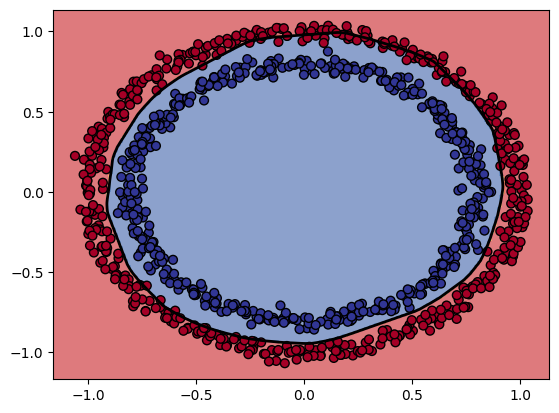

In [30]:
plot_decision_boundary(model_3, X, y)

## Finding the Best Learning Rate

* The most important hyperparameter you can tune for your neural network models
* Learning Rate Callback:- An extra piece of functionality you can add to your model while its training

In [10]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_4.compile(
                loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer="Adam",
                metrics = ["accuracy"]
                )
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

history_model_4 = model_4.fit(X, y,
                              epochs=100,
                              verbose=0,
                              callbacks=[lr_scheduler])



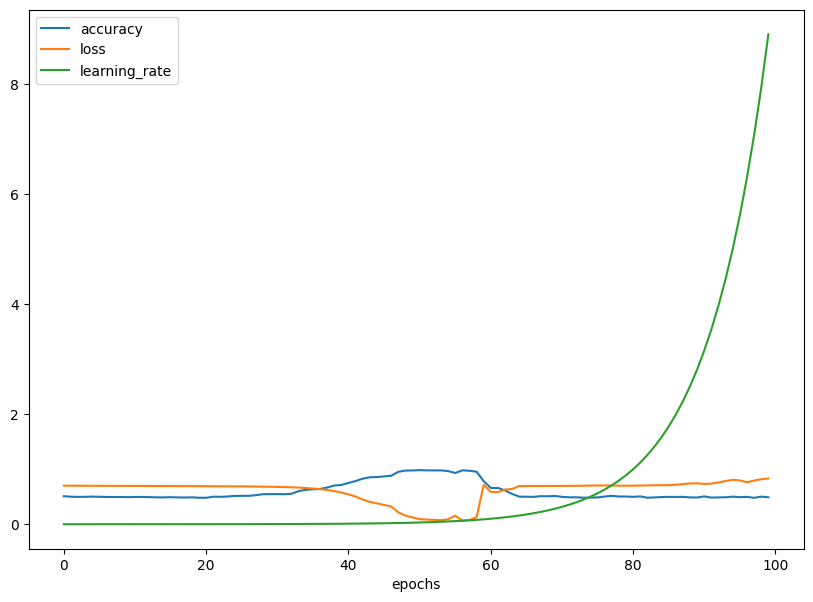

In [12]:
pd.DataFrame(history_model_4.history).plot(figsize=(10,7), xlabel="epochs")
plt.show()

## Point of Inflication
* We need to find the point where the loss in minimal.

Text(0.5, 1.0, 'Learning Rate vs Loss')

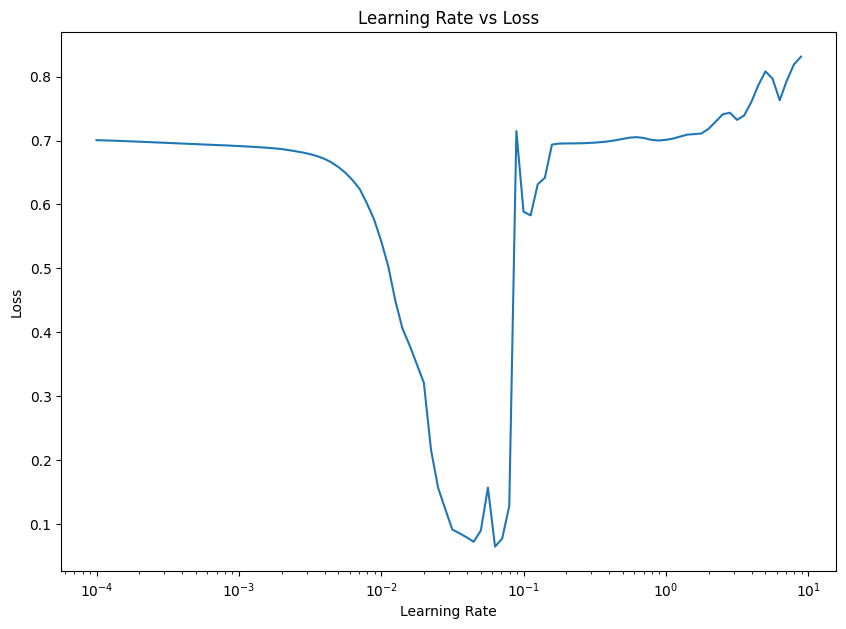

In [13]:
lrs = 1e-4 * (10 ** (np.arange(100)/20))

plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_model_4.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")


## Optimal Learning Rate

From the above graph we can easily find that the optimal learning rate is 0.02

In [14]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_5.compile(
                loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"]
                )
history_model_5 = model_5.fit(X, y, epochs=20, verbose=0)



In [15]:
model_5.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9841 - loss: 0.0534


[0.05002206191420555, 0.9850000143051147]

Even After Twenty EPOCHS the model is achieving the accuracy of 98%

## More Evaluation Methods

* **Accuracy:-** Out of 100 predictions, how many does your model get correct?
For Example 95% accuracy means that 95 were correct out of 100.
**Sklearn and Keras Accuracy Metrics**
sklearn.metrics.accuracy_score()
tf.keras.metrics.Accuracy()

* **Precision:-** Suppose you have an algorithm that predicts wither a mail is spam or not. Precision is "Of all the emails the model marked as spam, how many were actually spam?"
Precision = TP/TP + False Positives
So,when your model predicts positive, how often is it right.
For e.g:
* If you have 100 emails and the model predicts 20 as spam.
* Out of these 20, 15 are actually spam (True Positives) while 5 are incorrectly flagged as spam.
Precision = 15/ (15 + 5) = 0.75 = (75%)
So,
**When my Model says spam, it is 75% of the times correct**

**Scikit-learn and Keras Metrics**
sklearn.metrics.precision_score()
tf.keras.metrics.Precision()

* **Recall:-** Taking the same example of Spam Filter. Recall Says, "Of all the actual spam emails, how many did my model correctly catch as spam?"
Recall = TP/TP + FN
* Suppose we have 100 emails out of which 30 are actual spam emails.
* The model catches 20 spam emails correctly (TP=20) but it misses 10 spam emails (FN=10). So,
Recall = 20/20+10 = 67%
It can be summarized as
"When there was spam, my model caught it 67% of the time."
**Scikit-learn and Keras Metrics**
 sklearn.metrics.recall_score()
 tf.keras.metrics.Recall()


***Precision Vs Recall***
* Precision:- "When I say YES, am i correct?"
* Recall:- "Did i catch all the YES cases?"

**F1-score:-** It combines Precision and Recall into one metrics. 1 is best, 0 is worst
F1 = 2 x Precision x Recall/Precision + Recall
***Sklearn F1 Score***
sklearn.metrics.f1_score()

**Confusion Matrix:-** Compares the Predicted Values with the True values in a Tabular way, if 100% correct, all values in the matrix will be top left to bottom right (Diagnol Line).
sklearn.metrics.plot_confusion_matrix()

**Classification Report:-** Collection of some of the main classification metrics such as Precision, Recall and F1-score.
sklearn.metrics.classification_report()


In [16]:
loss, accuracy = model_5.evaluate(X,y)

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Loss: {loss:.2f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9841 - loss: 0.0534
Accuracy: 98.50%
Loss: 0.05
